HW6
Spectral Clustering
Single Monte Carlo Iteration

Additionally for simplicity, gamma will be chosen 1 rather than finding a gamma that 'balances' the clusters in line with the original train

NOTE :
Data is NORMALIZED here

Spectral Clustering without Normalization gave weird results with larger run times (only single cluster was obtained, despite n_clusters = 2)

THUS
Data for Spectral Clustering will be taken as NORMALIZED, again, only ONCE

For KMeans, we performed all the operations over RAW data
For Comparison, and if time permits, we may perform KMeans again with normalized data


Data, here, for Spectral Clustering, ONCE WHOLE a priori NORMALIZED

In [146]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")  
from sklearn.preprocessing import normalize

df = pd.read_csv('wdbc.csv', header = None)


output = df.iloc[:,0]


for i in np.arange(0,df.shape[0]):
    if output.iloc[i] == 'B':
        output.iloc[i] = 0
    else:
        output.iloc[i] = 1



features = df.iloc[:,1:]




features_normal = normalize(features)


features_normal_df = pd.DataFrame(features_normal)


norm_whole = pd.concat([features_normal_df,output],axis=1)


col_head = norm_whole.columns


norm_whole.columns= ['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23','X24','X25','X26','X27','X28','X29','X30','y']


norm_whole.sort_values(by=['y'],inplace=True)


norm_whole.reset_index(drop=True,inplace=True)


X_y_0 = norm_whole.iloc[0:357,:]
X_y_1 = norm_whole.iloc[357:569,:]
X_y_1.reset_index(drop=True,inplace=True)

print(X_y_0)             
print(X_y_1)

           X1        X2        X3        X4        X5        X6        X7  \
0    0.016129  0.019645  0.105206  0.646400  0.000098  0.000120  0.000140   
1    0.013871  0.012063  0.089169  0.649979  0.000073  0.000063  0.000031   
2    0.015547  0.022945  0.099711  0.583676  0.000118  0.000091  0.000056   
3    0.015343  0.019407  0.097872  0.632479  0.000091  0.000065  0.000025   
4    0.012479  0.013833  0.080621  0.633850  0.000073  0.000064  0.000044   
..        ...       ...       ...       ...       ...       ...       ...   
352  0.017087  0.026370  0.111113  0.621093  0.000135  0.000166  0.000095   
353  0.023793  0.041898  0.156159  0.651858  0.000252  0.000330  0.000246   
354  0.016420  0.021414  0.105291  0.606570  0.000133  0.000098  0.000057   
355  0.017271  0.016378  0.111015  0.610479  0.000142  0.000101  0.000053   
356  0.013891  0.022823  0.089856  0.629665  0.000085  0.000082  0.000029   

           X8        X9       X10  ...       X22       X23       X24  \
0  

In [147]:
from sklearn.model_selection import train_test_split

X_y_train_0,X_y_test_0 = train_test_split(X_y_0,test_size = 0.2,shuffle=True)
X_y_train_1,X_y_test_1 = train_test_split(X_y_1,test_size = 0.2,shuffle=True)



X_y_train = pd.concat([X_y_train_0,X_y_train_1],axis=0)
X_y_test = pd.concat([X_y_test_0,X_y_test_1],axis=0)


from sklearn.utils import shuffle

X_y_train = shuffle(X_y_train)
X_y_test = shuffle(X_y_test)



X_y_train.reset_index(drop=True,inplace=True)
X_y_test.reset_index(drop=True,inplace=True)


X_train = X_y_train.drop(columns=['y'])
X_test = X_y_test.drop(columns=['y'])
y_train = X_y_train['y'].astype(int)
y_test =  X_y_test['y'].astype(int)
print(X_train)
print(y_train)
print(X_test)
print(y_test)


           X1        X2        X3        X4        X5        X6        X7  \
0    0.012712  0.019313  0.083631  0.535813  0.000110  0.000153  0.000087   
1    0.017223  0.030666  0.110656  0.628386  0.000142  0.000118  0.000037   
2    0.017032  0.031194  0.109796  0.597249  0.000164  0.000139  0.000068   
3    0.016420  0.021414  0.105291  0.606570  0.000133  0.000098  0.000057   
4    0.009222  0.012803  0.060743  0.547744  0.000049  0.000070  0.000092   
..        ...       ...       ...       ...       ...       ...       ...   
449  0.018629  0.025192  0.119247  0.628884  0.000135  0.000119  0.000060   
450  0.013891  0.022823  0.089856  0.629665  0.000085  0.000082  0.000029   
451  0.013510  0.016500  0.088482  0.582980  0.000106  0.000124  0.000095   
452  0.008610  0.009831  0.056378  0.500936  0.000042  0.000064  0.000049   
453  0.016406  0.023998  0.104639  0.600502  0.000126  0.000087  0.000040   

           X8        X9       X10  ...       X21       X22       X23  \
0  

In [148]:
from sklearn.cluster import SpectralClustering




specclus = SpectralClustering(n_clusters=2,gamma=1,affinity='rbf',n_init=10).fit(X_train)  # gamma selected as 1 for simplicity


    
# NOTE : Both KMeans and SpectralCLustering have n_init = 10. As such the external loop is not required.
# FOR KMeans ---- The external loop was used, to increase chances of global optimal even more
# In KMeans, thus, each external iteration has 10 more internal iterations, and we assume that by the final iteration
# (where again KMeans will be internally done 10 more times) the algorithm has converged, or the overall chances of the 
# algorithm converging have increased

# FOR SpectralClustering : External loop, again, as such not needed, could be used like it was in KMeans to increase
# chances of convergence even more (convergence to global optimal assumed as we reach the final iteration)

# However the external loop for SpectralClustering, hasn't been used, as it does increase the run times 
# As is, the external loop was not completely necessary, as internally, both KMeans and SpectralClustering, run the 
# loops multiple times to pick the most minimal inertia fit (global optimal) (objective function) over all the times

# In conclusion : external loop may be used, though not completely necessary, as the functions do it internally, and for KMeans
# it has been used, but for SpectralClustering, hasn't been used, due to large run times in general.

y_train_pred_cluster = specclus.labels_

print(y_train_pred_cluster)    

[1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0
 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0
 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0
 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0
 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0
 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 0 0 1 1 0]


In [149]:
# Polling will be done over all the cluster points in each cluster

all_indx = np.arange(0,X_train.shape[0])


list_cluster_0 = []        
list_cluster_1 = []         

for i in all_indx:
    if y_train_pred_cluster[i] == 0:
        list_cluster_0.append(i)
    else:
        list_cluster_1.append(i)
        

sel_indx_0_cls = np.array(list_cluster_0).flatten()  # sel_indx_0_cls contains indices of ALL samples in cluster 0
sel_indx_1_cls = np.array(list_cluster_1).flatten()  # sel_indx_1_cls contains indices of ALL samples in cluster 1

print(sel_indx_0_cls)
print(sel_indx_1_cls)

[  1   2   3   5   6   8   9  10  12  13  15  17  18  19  20  21  22  23
  24  27  28  30  31  32  33  34  36  37  38  39  41  44  47  49  50  53
  54  55  58  60  61  62  63  64  66  69  70  71  72  73  74  76  77  78
  79  80  81  83  86  88  89  90  91  92  93  94  95  96  98 100 102 103
 105 107 108 109 110 111 112 113 114 115 119 120 121 122 123 124 125 126
 127 129 130 131 132 134 136 137 138 140 143 145 146 147 148 152 154 155
 156 158 159 160 162 163 167 169 170 172 173 174 175 176 177 178 180 181
 183 184 187 189 190 191 192 193 195 197 198 199 200 201 202 203 204 206
 207 208 209 210 213 214 215 216 219 220 221 222 223 226 227 228 229 231
 232 234 235 236 238 239 242 243 246 248 249 253 254 256 258 259 261 262
 263 264 265 267 268 269 271 272 273 274 275 276 277 278 279 281 283 284
 286 287 288 290 291 292 293 295 296 297 299 300 301 302 303 304 305 306
 307 309 310 311 313 314 315 316 317 318 319 320 321 323 324 325 326 327
 328 329 331 332 333 334 335 336 337 339 340 342 34

In [150]:
y_train_read_0 = y_train[sel_indx_0_cls]    # has true labels of all samples in cluster 0
y_train_read_1 = y_train[sel_indx_1_cls]    # has true labels of all samples in cluster 1

print(y_train_read_0)
print(y_train_read_1)

1      0
2      0
3      0
5      0
6      0
      ..
447    0
448    0
449    0
450    0
453    0
Name: y, Length: 324, dtype: int32
0      1
4      1
7      1
11     1
14     1
      ..
440    1
444    1
446    1
451    1
452    1
Name: y, Length: 130, dtype: int32


In [151]:
import math
pol_thrsh = 0.5 

read_labels_0 = y_train_read_0.to_numpy().flatten()   
read_labels_1 = y_train_read_1.to_numpy().flatten()   

pol_num_0 = math.floor(pol_thrsh*read_labels_0.size)    
pol_num_1 = math.floor(pol_thrsh*read_labels_1.size)     


pol_cnt_c0_0 = 0                   
pol_cnt_c1_0 = 0                   

for i in np.arange(0,read_labels_0.size):
    if read_labels_0[i] == 0:
        pol_cnt_c0_0 = pol_cnt_c0_0 + 1
        

if pol_cnt_c0_0 > pol_num_0:
    clus_0 = 0
else:
    clus_0 = 1
    


for i in np.arange(0,read_labels_1.size):
    if read_labels_1[i] == 0:
        pol_cnt_c1_0 = pol_cnt_c1_0 + 1
        

if pol_cnt_c1_0 > pol_num_1:
    clus_1 = 0
else:
    clus_1 = 1
    

    
print(clus_0)
print(clus_1)

0
1


In [152]:
y_train_pred = np.zeros(X_train.shape[0])

for i in np.arange(0,X_train.shape[0]):
    if y_train_pred_cluster[i] == 0:
        y_train_pred[i] = clus_0
    else:
        y_train_pred[i] = clus_1
        
y_train_pred = y_train_pred.astype(int)
print(y_train_pred)

[1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0
 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0
 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0
 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0
 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0
 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 0 0 1 1 0]


In [153]:
mis = 0
for l in np.arange(0,X_train.shape[0]):
    if y_train_pred[l] != y_train.iloc[l]:
        mis = mis + 1

train_error = (mis/X_train.shape[0])*100
print('The training error is : \n',train_error,'%')

The training error is : 
 11.233480176211454 %


In [154]:
from sklearn.metrics import confusion_matrix

confusion_matrix_train = confusion_matrix(y_train,y_train_pred)

print('The confusion matrix for training is : \n',confusion_matrix_train)

The confusion matrix for training is : 
 [[279   6]
 [ 45 124]]


In [155]:
confusion_matrix_train_df = pd.DataFrame(confusion_matrix_train,index=['Actually 0','Actually 1'],columns=['Predicted 0','Predicted 1'])
print('The confusion matrix for train, appropriately indexed is : \n',confusion_matrix_train_df)

The confusion matrix for train, appropriately indexed is : 
             Predicted 0  Predicted 1
Actually 0          279            6
Actually 1           45          124


In [156]:
precision_train = (confusion_matrix_train[1][1]/(confusion_matrix_train[1][1]+confusion_matrix_train[0][1]))*100
recall_train = (confusion_matrix_train[1][1]/(confusion_matrix_train[1][1]+confusion_matrix_train[1][0]))*100

print('The precision for train is : \n',precision_train,'%')
print('The recall for train is : \n',recall_train,'%')

The precision for train is : 
 95.38461538461539 %
The recall for train is : 
 73.37278106508876 %


In [157]:
accuracy_train = ((confusion_matrix_train[0][0]+confusion_matrix_train[1][1])/(confusion_matrix_train[0][0]+confusion_matrix_train[1][1]+confusion_matrix_train[0][1]+confusion_matrix_train[1][0]))*100
f1_train = ((2*(precision_train/100)*(recall_train/100))/((precision_train/100)+(recall_train/100))) # divided by 100 as precision and recall specified in percentage
print('The accuracy for training is : \n',accuracy_train,'%')
print('The f1 score for training is : \n',f1_train)

The accuracy for training is : 
 88.76651982378854 %
The f1 score for training is : 
 0.8294314381270904


In [158]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=1).fit(X_train,y_train_pred_cluster)       # KNN to obtain test cluster assignment, classify test point to the cluster of the point closest to it
y_test_pred_cluster = neigh.predict(X_test)

print(y_test_pred_cluster)

[1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1
 1 0 1 1]


In [159]:
y_test_pred = np.zeros(X_test.shape[0])
for i in np.arange(0,X_test.shape[0]):
    if y_test_pred_cluster[i] == 0:
        y_test_pred[i] = clus_0
    else:
        y_test_pred[i] = clus_1

y_test_pred = y_test_pred.astype(int)
print(y_test_pred)

[1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1
 1 0 1 1]


In [160]:
mis = 0
for l in np.arange(0,X_test.shape[0]):
    if y_test_pred[l] != y_test.iloc[l]:
        mis = mis + 1

test_error = (mis/X_test.shape[0])*100
print('The test error is obtained : \n',test_error,'%')

The test error is obtained : 
 13.91304347826087 %


In [161]:
confusion_matrix_test = confusion_matrix(y_test,y_test_pred)

print('The confusion matrix for test is : \n',confusion_matrix_test)

The confusion matrix for test is : 
 [[70  2]
 [14 29]]


In [162]:
confusion_matrix_test_df = pd.DataFrame(confusion_matrix_test,index=['Actually 0','Actually 1'],columns=['Predicted 0','Predicted 1'])
print('The confusion matrix for test, appropriately indexed is : \n',confusion_matrix_test_df)

The confusion matrix for test, appropriately indexed is : 
             Predicted 0  Predicted 1
Actually 0           70            2
Actually 1           14           29


In [163]:
precision_test = (confusion_matrix_test[1][1]/(confusion_matrix_test[1][1]+confusion_matrix_test[0][1]))*100
recall_test = (confusion_matrix_test[1][1]/(confusion_matrix_test[1][1]+confusion_matrix_test[1][0]))*100

print('The precision for test is : \n',precision_test,'%')
print('The recall for test is : \n',recall_test,'%')

The precision for test is : 
 93.54838709677419 %
The recall for test is : 
 67.44186046511628 %


In [164]:
accuracy_test = ((confusion_matrix_test[0][0]+confusion_matrix_test[1][1])/(confusion_matrix_test[0][0]+confusion_matrix_test[1][1]+confusion_matrix_test[0][1]+confusion_matrix_test[1][0]))*100
f1_test = ((2*(precision_test/100)*(recall_test/100))/((precision_test/100)+(recall_test/100)))
print('The accuracy for test is : \n',accuracy_test,'%')
print('The f1 score for test is : \n',f1_test)

The accuracy for test is : 
 86.08695652173914 %
The f1 score for test is : 
 0.7837837837837838


In [165]:
pol_thrsh_ra_range = np.arange(0,1.01,0.01)  
ROC_df = pd.DataFrame(index=pol_thrsh_ra_range,columns=['FPR','TPR'])
ROC_df_test = pd.DataFrame(index=pol_thrsh_ra_range,columns=['FPR','TPR'])



for ra in np.arange(0,pol_thrsh_ra_range.size):
    
    pol_thrsh_ra = pol_thrsh_ra_range[ra]
    
    pol_num_0_ra = math.floor(pol_thrsh_ra*read_labels_0.size)    
    pol_num_1_ra = math.floor(pol_thrsh_ra*read_labels_1.size)
    
    pol_cnt_c0_0_ra = 0                    
    pol_cnt_c1_0_ra = 0                    


    for i in np.arange(0,read_labels_0.size):
        if read_labels_0[i] == 0:
            pol_cnt_c0_0_ra = pol_cnt_c0_0_ra + 1


    if pol_cnt_c0_0_ra > pol_num_0_ra:
        clus_0_ra = 0
    else:
        clus_0_ra = 1



    for i in np.arange(0,read_labels_1.size):
        if read_labels_1[i] == 0:
            pol_cnt_c1_0_ra = pol_cnt_c1_0_ra + 1


    if pol_cnt_c1_0_ra > pol_num_1_ra:
        clus_1_ra = 0
    else:
        clus_1_ra = 1



    
    y_train_pred_ra = np.zeros(X_train.shape[0])

    for i in np.arange(0,X_train.shape[0]):
        if y_train_pred_cluster[i] == 0:
            y_train_pred_ra[i] = clus_0_ra
        else:
            y_train_pred_ra[i] = clus_1_ra

    y_train_pred_ra = y_train_pred_ra.astype(int)
    
    
    
    
    
    
    
    
    y_test_pred_ra = np.zeros(X_test.shape[0])
    for i in np.arange(0,X_test.shape[0]):
        if y_test_pred_cluster[i] == 0:
            y_test_pred_ra[i] = clus_0_ra
        else:
            y_test_pred_ra[i] = clus_1_ra

    y_test_pred_ra = y_test_pred_ra.astype(int)
    
    
    
    confusion_matrix_train_ra = confusion_matrix(y_train,y_train_pred_ra)
    ROC_df.iloc[ra,0] = confusion_matrix_train_ra[0][1]/(confusion_matrix_train_ra[0][1]+confusion_matrix_train_ra[0][0])
    ROC_df.iloc[ra,1] = confusion_matrix_train_ra[1][1]/(confusion_matrix_train_ra[1][1]+confusion_matrix_train_ra[1][0])
    
    
    confusion_matrix_test_ra = confusion_matrix(y_test,y_test_pred_ra)
    ROC_df_test.iloc[ra,0] = confusion_matrix_test_ra[0][1]/(confusion_matrix_test_ra[0][1]+confusion_matrix_test_ra[0][0])
    ROC_df_test.iloc[ra,1] = confusion_matrix_test_ra[1][1]/(confusion_matrix_test_ra[1][1]+confusion_matrix_test_ra[1][0])

    


    
print(ROC_df)
print(ROC_df_test)

     FPR TPR
0.00   0   0
0.01   0   0
0.02   0   0
0.03   0   0
0.04   0   0
...   ..  ..
0.96   1   1
0.97   1   1
0.98   1   1
0.99   1   1
1.00   1   1

[101 rows x 2 columns]
     FPR TPR
0.00   0   0
0.01   0   0
0.02   0   0
0.03   0   0
0.04   0   0
...   ..  ..
0.96   1   1
0.97   1   1
0.98   1   1
0.99   1   1
1.00   1   1

[101 rows x 2 columns]


Text(0, 0.5, 'TPR for Train')

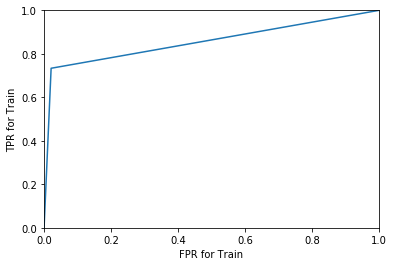

In [166]:
import matplotlib.pyplot as plt
plt.plot(ROC_df['FPR'],ROC_df['TPR'])
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('FPR for Train')
plt.ylabel('TPR for Train')

Text(0, 0.5, 'TPR for Test')

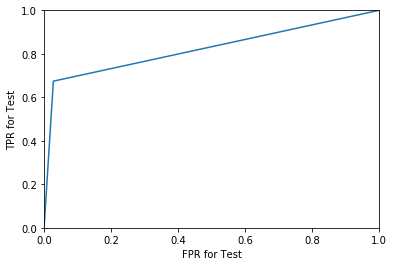

In [167]:
plt.plot(ROC_df_test['FPR'],ROC_df_test['TPR'])
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('FPR for Test')
plt.ylabel('TPR for Test')

In [168]:
from sklearn import metrics

AUC_train = metrics.auc(ROC_df['FPR'],ROC_df['TPR'])
print('The AUC for train is : \n',AUC_train)

The AUC for train is : 
 0.8563375895359702


In [169]:
AUC_test = metrics.auc(ROC_df_test['FPR'],ROC_df_test['TPR'])
print('The AUC for test is : \n',AUC_test)

The AUC for test is : 
 0.8233204134366924
